# 6일차-실습

## 웹에서 데이터 수집 & Pandas DataFrame으로 표현하기

### [실습] (특정 키워드에 대한) 네이버 검색(뉴스) 결과 100개를 DataFrame으로 표현하기

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# 검색할 데이터 건수
count = 150
# 한번에 검색되는 건수
cnt = 10

def get_newsdata(search): 
    url = 'https://search.naver.com/search.naver?where=news&query={}&start='
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/100.0.48496.75'}

    # 뉴스 추출 반복
    new_titles, urls = [], []
    for tcnt in range( round(count/cnt)  ):    
        #html불러오기
        original_html = requests.get(url.format(search) + str(len(new_titles)) , headers=headers)
        html = BeautifulSoup(original_html.text, 'html.parser')

        # 검색결과
        articles = html.select('ul.list_news > li > div > div > a')

        #뉴스기사 제목 가져오기
        for i in articles:
            new_titles.append(i.attrs['title'])
            urls.append(i.attrs['href'])

        print(f'{round(len(new_titles)/count*100)}%', end=' ')

    print('finish! ---------------')
    titles = {'제목':new_titles, 'url':urls}
    
    return titles


# 검색어 입력
search = input('검색할 키워드 입력: ')
search = search.replace(' ', '+')

titles = get_newsdata(search) # 함수 호출

df = pd.DataFrame(titles)
df

-------

# 파이썬라이브러리 - Matplotlib

### 라이브러리 설치

In [ ]:
!pip install matplotlib

### 라이브러리 사용

In [ ]:
import matplotlib as mpl

mpl.__version__

## matplolib 사용 예제:

### 1. 단일 그래프 표현

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'
# ticklabel의 음수 표현 
plt.rcParams['axes.unicode_minus'] = False
# 그래프 크기
plt.rcParams['figure.figsize'] = (6, 4)

# 년도별 3.0이상 지진강도 횟수
X = list(range(2005,2015))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.plot(X, Y, c='r', zorder=3)  # 선 그래프
plt.bar(X, Y, zorder=1)          # 막대 그래프
plt.scatter(X, Y, s=100, c='orange', zorder=2)  # 점 그래프
plt.grid(True)
plt.xlabel('년도')
plt.ylabel('횟수') 
plt.title('년도별 3.0이상 지진강도 횟수')
plt.show()

### 2. 하나의 그래프에 여러 개의 그래프 표현하기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 크기
plt.rcParams['figure.figsize'] = (10, 6)  #인치
# ticklabel의 음수 표현 
plt.rcParams['axes.unicode_minus'] = False

# 그래프 표현 공간 나누기
fig, ax = plt.subplots(2, 2)   # 2행 2열 그래프

# 선 그래프
X = np.linspace(0, 10, 100)
Y = np.cos(X)
ax[0, 0].plot(X, Y)

# 막대 그래프
X = np.arange(10)
Y = np.random.uniform(1,10,10) # 균일분포값
ax[0, 1].bar(X, Y)

# 점 그래프
X = np.random.randn(100)   # 정규 분포 데이터
Y = np.random.randn(100)
ax[1, 0].scatter(X, Y)

# 이미지 그래프
Z = np.random.uniform(0,1, (5,5) ) # 0~1사이의 균일분포 데이터 5x5로 추출
ax[1, 1].imshow(Z)

plt.show()

### 3. 파일 읽어서 그래프로 나타내기

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/HousingData.csv')
print(df.columns)

cols = ['CRIM','CHAS','NOX', 'RM','PTRATIO', 'B']
for idx, col in enumerate(cols):
    plt.subplot(2, 3, idx+1)   #plt.subplot(231)
    plt.scatter(df[col], df['MEDV'], s=5)
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.show()

FileNotFoundError: ignored

#### - pandas DataFrame의 피어슨 상관계수로 변수들간의 상관성 표현

In [ ]:
df[df.columns].corr(method='pearson')

#### pandas DataFrame으로 피어슨 상관계수를 그래프(Heatmap)로 표현

In [ ]:
import seaborn as sns

plt.style.use('default')

fig = plt.figure(figsize=(10,6))
ax = fig.gca()

corr = df[df.columns].corr(method='pearson')

heatmap = sns.heatmap(corr.values, annot=True, fmt='.2f',
                      xticklabels=df.columns, yticklabels=df.columns, ax=ax) # , cmap='RdYlBu'  spring
plt.tight_layout()
plt.show()

## 1.Matplotlib 기본 설정

### 한글 폰트 설정

#### - 전체 적용

In [ ]:
#import matplotlib as mpl

# 현재 설정되어 있는 폰트 조회
# print(mpl.rcParams['font.family'])
# print(mpl.rcParams['font.size'])


import matplotlib.pyplot as plt

# 현재 설정되어 있는 폰트 조회
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

plt.rcParams['font.family']  = 'Malgun Gothic'
plt.rcParams['font.size'] = 15

#### - 특정 그래프의 폰트 지정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = 'C:\Windows\Fonts\gulim.ttc'
fontprop = fm.FontProperties(fname=fontpath)
plt.title('예시title',  fontproperties=fontprop)
plt.show()

### 그래프 크기

#### - 전체 적용

In [ ]:
import matplotlib.pyplot as plt

# 현재 설정되어 있는 그래프 크기
print(plt.rcParams['figure.figsize'])
plt.rcParams['figure.figsize'] = (6, 4)

# ticklabel의 음수 표현 
plt.rcParams['axes.unicode_minus'] = False

#### - 부분 적용

In [ ]:
plt.figure(figsize=(6, 4))

### 그래프 스타일
- plt.style.use(style-name)
> - default, classic, grayscale, ggplot, seaborn, dark_background  
> - fast, bmh, Solarize_Light2, seaborn-notebook, seaborn-whitegrid

In [ ]:
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 100)
Y = np.cos(X)

# 그래프 스타일
plt.style.use('dark_background')
plt.figure(figsize=(4, 3))
plt.plot(X, Y, linewidth=3, color='w')
plt.grid(color='r', linestyle='dotted', linewidth=2)
#plt.grid(axis='y', color='r', linestyle='dotted', linewidth=2)  # 그리드 표시 축지정
plt.show()

NameError: ignored

### 그래프 스타일 참고 사이트

- **Gallery** 
- https://matplotlib.org/stable/gallery/index.html
- **LineStyle**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle
- **Color**
- https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
- **ColorMap**
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- **Marker**
- https://matplotlib.org/stable/api/markers_api.html?highlight=marker#module-matplotlib.markers

## 2. 기본 그래프

### 선(Line) 그래프
- pyplot.**plot**(*args, scalex=True, scaley=True, data=None, **kwargs)

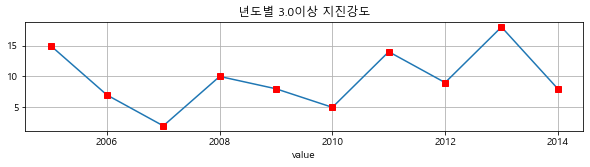

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'
# ticklabel의 음수 표현 
plt.rcParams['axes.unicode_minus'] = False
# 그래프 크기
plt.rcParams['figure.figsize'] = (10, 2)

# 년도별 3.0이상 지진강도 횟수
X = list(range(2005,2015))
Y = [15,7,2,10,8,5,14,9,18,8]
# X = pd.date_range('20220101', periods=1000)
# Y = np.random.randn(1000)

# data = Y
# plt.plot(data)
plt.plot(X, Y)
plt.plot(X, Y, 's', linestyle='dotted',  color='r')
plt.title('년도별 3.0이상 지진강도')
plt.xlabel('년도')
plt.xlabel('value')
plt.grid()
# plt.xticks(X, rotation=20)
# plt.yticks(Y)
plt.show()

### [실습] Housing데이터에서 열 2개 추출하여 각각 선 그래프로 표현하기

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


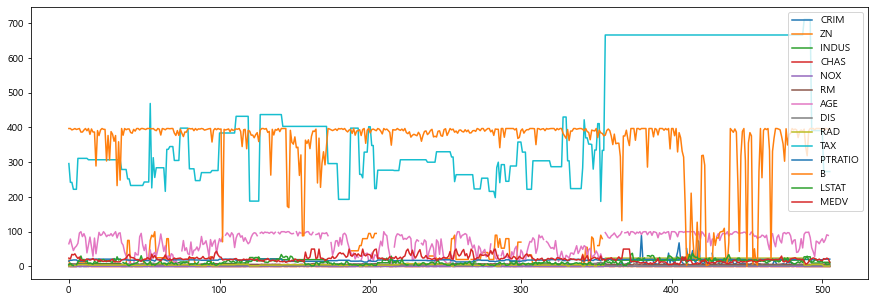

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/HousingData.csv')  # 파일 읽어오기
print(df.columns)     

plt.figure(figsize=(15, 5))
# plt.plot(df['CRIM'])
# plt.plot(df['PTRATIO'])
plt.plot(df[df.columns])
plt.legend(df.columns)      # 범례 표시

plt.savefig('graph.png')    # 그림파일로 저장
plt.show()

#### -1차 방정식 그래프

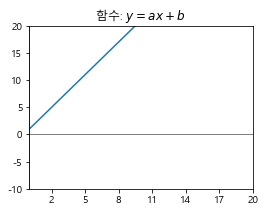

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (4, 3)

# y = ax + b
a, b = 2, 1
x = np.array([-10, -5, 0, 10, 14, 19, 20, 25])
y = a*x + b

plt.plot(x, y)
plt.axvline(x=0, color='black', linewidth=0.5) # x축 가로선
plt.axhline(y=0, color='black', linewidth=0.5) # y축 세로선
plt.xticks(np.arange(-10,30,3)) # x축 눈금
plt.xlim(0, 20)   # xlimit: x축에 나타낼 수 있는 범위
plt.ylim(-10,20)  # ylimit: y축에 나타낼 수 있는 범위
plt.title('함수: $y=ax+b$')
plt.show()

#### - 2차 방정식 그래프

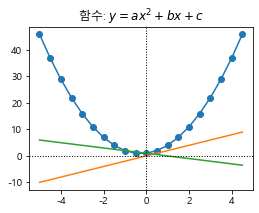

In [ ]:
# y = ax^2 + bx + c
a, b, c = 2, 1, 1
#x = np.array([-10, -5, 0, 10, 14, 19, 20, 25])
x = np.arange(-5, 5, 0.5)
y = a*x**2 + b*x + c

plt.plot(x, y, 'o', linestyle='solid')
plt.plot(x, a*x)
plt.plot(x, -b*x+c)
plt.axvline(x=0, color='black', linestyle='dotted', linewidth=1) # x축 가로선
plt.axhline(y=0, color='black', linestyle='dotted',linewidth=1) # y축 세로선
plt.title('함수: $y=ax^2+bx+c$')

plt.grid(False)
plt.show()

### 점(Scatter) 그래프
- pyplot.**scatter**(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)

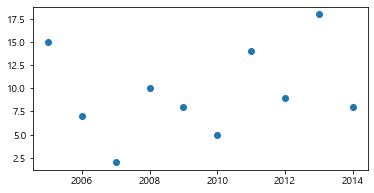

In [ ]:
plt.rcParams['figure.figsize'] = (6, 3)

X = list(range(2005,2015))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.scatter(X, Y)
plt.show()

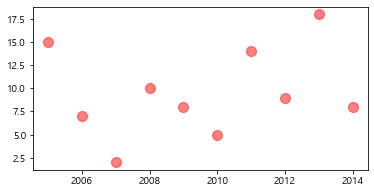

In [ ]:
plt.scatter(X, Y, c='r', s=100, alpha=0.5)
plt.show()

[1500, 700, 200, 1000, 800, 500, 1400, 900, 1800, 800]
[0.8933958  0.33504252 0.5874876  0.60063147 0.27742954 0.71104726
 0.37725325 0.28087395 0.16181983 0.60476804]


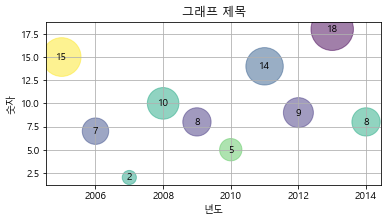

In [ ]:
d_size = [ y*100 for y in Y]
colors = np.random.rand(len(Y))
print(d_size)
print(colors)

plt.scatter(X, Y, c=colors, s=d_size, alpha=0.5)
plt.grid()
plt.xlabel('년도')
plt.ylabel('숫자')
plt.title('그래프 제목')
for x, y in zip(X, Y):     
    plt.text(x, y, str(y), fontsize=10, 
             horizontalalignment='center', verticalalignment='center')  # x,y좌표에 글자 넣기
plt.show()


#### -Hyerlink 적용된 이미지로 표현하기

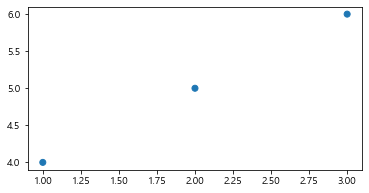

In [ ]:
s = plt.scatter([1,2,3],[4,5,6])
s.set_urls(['https://www.naver.com', 'https://google.com', 'https://daum.net'])
plt.savefig('graph/hyperlink.svg')

# plt.imshow('graph/basic.png')

plt.show()


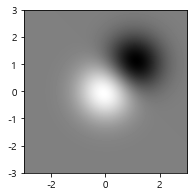

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig = plt.figure()
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.gray,
                origin='lower', extent=[-3, 3, -3, 3])

im.set_url('https://www.google.com/')
fig.savefig('graph/image.svg')

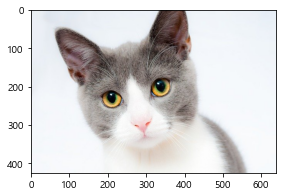

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

img = img.imread('image/cat.jpg')
im = plt.imshow(img) 
im.set_url('https://naver.com/')
plt.savefig('graph/cat.svg')

plt.show()